# Classifications methods

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
df = pd.read_csv('/content/trial_data.csv')
df

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Ava,Johnson,ava.johnson.1@example.com,female,False,3,True,25,Lawyer,82,75,88,90,80,85,78
1,2,Liam,Smith,liam.smith.2@example.com,male,True,1,False,30,Doctor,90,85,92,87,83,88,81
2,3,Emma,Brown,emma.brown.3@example.com,female,False,2,True,20,Government Officer,78,80,84,85,79,76,82
3,4,Noah,Garcia,noah.garcia.4@example.com,male,False,0,True,35,Engineer,95,88,90,92,85,87,90
4,5,Olivia,Wilson,olivia.wilson.5@example.com,female,True,4,False,28,Teacher,76,72,88,80,77,81,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Mia,Thompson,mia.thompson.496@example.com,female,False,3,True,25,Researcher,88,81,88,89,82,79,83
496,497,Ethan,Wright,ethan.wright.497@example.com,male,True,4,False,30,Doctor,90,86,89,88,81,80,84
497,498,Sophia,Lee,sophia.lee.498@example.com,female,False,1,True,25,Pharmacist,85,80,88,90,82,81,82
498,499,Lillian,Johnson,lillian.johnson.499@example.com,female,True,2,True,20,Artist,90,82,90,88,81,78,84


In [ ]:
df = df.drop(columns=['first_name','last_name','email'])

In [ ]:
df = df.rename(columns={'absence_days': 'attendance_percent'})

In [ ]:
df['attendance_percent'] = df['attendance_percent'] * 10

In [ ]:
numeric_df = df.select_dtypes(include='number')

medians = numeric_df.median()
df[numeric_df.columns] = df[numeric_df.columns].fillna(medians)

In [ ]:
# Encode categorical variables into numeric values
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['part_time_job'] = label_encoder.fit_transform(df['part_time_job'])
df['extracurricular_activities'] = label_encoder.fit_transform(df['extracurricular_activities'])

In [ ]:
# Calculate the average score across all subjects
df['average_score'] = df[['math_score', 'history_score', 'physics_score',
                          'chemistry_score', 'biology_score', 'english_score',
                          'geography_score']].mean(axis=1)

In [ ]:
df.head()

,id,gender,part_time_job,attendance_percent,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,average_score
0,1,0,0,30,1,25,Lawyer,82,75,88,90,80,85,78,82.571429
1,2,1,1,10,0,30,Doctor,90,85,92,87,83,88,81,86.571429
2,3,0,0,20,1,20,Government Officer,78,80,84,85,79,76,82,80.571429
3,4,1,0,0,1,35,Engineer,95,88,90,92,85,87,90,89.571429
4,5,0,1,40,0,28,Teacher,76,72,88,80,77,81,83,79.571429


In [ ]:
performance_threshold = 70 # score
attendance_threshold =  50# attendance

# Define the risk classification based on performance and attendance
df['at_risk'] = ((df['average_score'] < performance_threshold) |
                 (df['attendance_percent'] < attendance_threshold)).astype(int)


# Splitting data into features (X) and target (y)
X = df[['average_score', 'attendance_percent', 'part_time_job', 'extracurricular_activities', 'weekly_self_study_hours']]
y = df['at_risk']

In [ ]:
  # Assuming `df` is your preprocessed dataframe
X = df[['average_score', 'attendance_percent', 'part_time_job', 'extracurricular_activities', 'weekly_self_study_hours']]
y = df['at_risk']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()

    print("Testing Accuracy")
    print(model.score(X_test, y_test))
    print("Training Accuracy")
    print(model.score(X_train, y_train))

Model: DecisionTreeClassifier
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        99

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



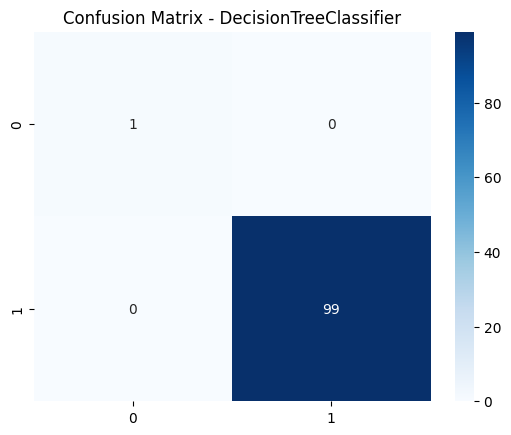

Testing Accuracy
1.0
Training Accuracy
1.0
Model: RandomForestClassifier
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        99

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



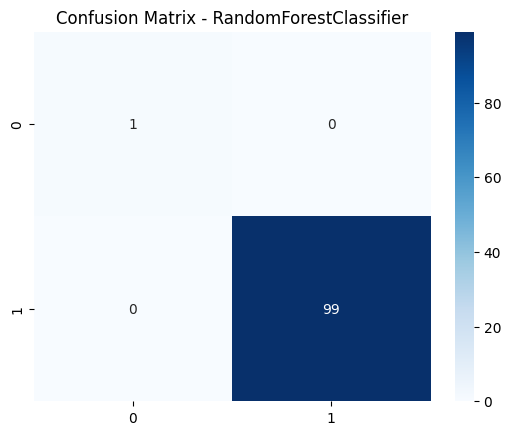

Testing Accuracy
1.0
Training Accuracy
1.0
Model: GradientBoostingClassifier
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        99

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



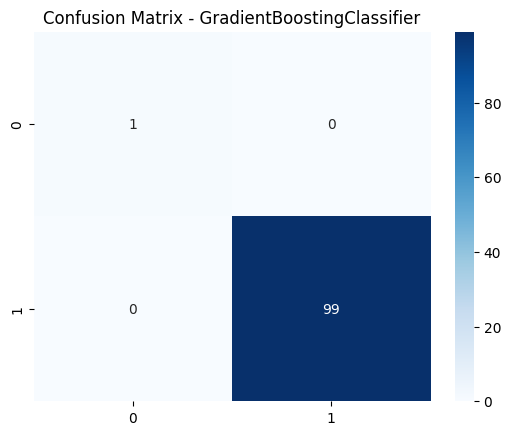

Testing Accuracy
1.0
Training Accuracy
1.0
Model: KNeighborsClassifier
Accuracy: 0.9900
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      0.99        99

    accuracy                           0.99       100
   macro avg       0.49      0.50      0.50       100
weighted avg       0.98      0.99      0.99       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


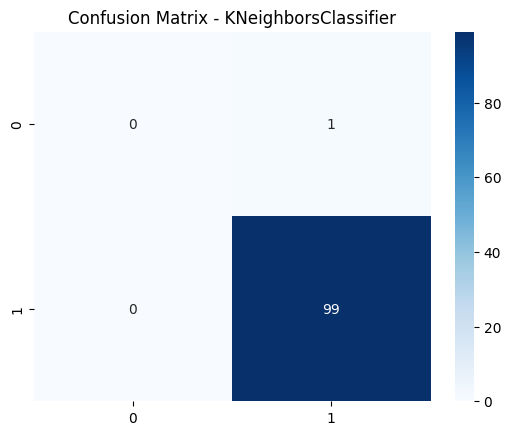

Testing Accuracy
0.99
Training Accuracy
0.995
Model: SVC
Accuracy: 0.9900
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      0.99        99

    accuracy                           0.99       100
   macro avg       0.49      0.50      0.50       100
weighted avg       0.98      0.99      0.99       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


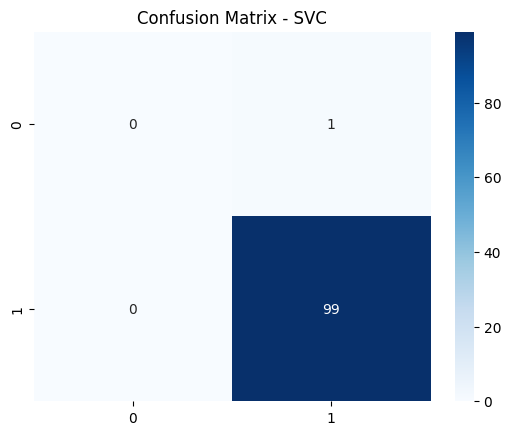

Testing Accuracy
0.99
Training Accuracy
0.995
Model: LogisticRegression
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        99

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



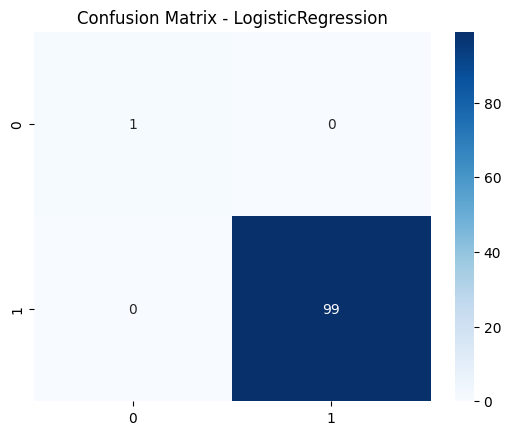

Testing Accuracy
1.0
Training Accuracy
1.0


In [ ]:
# 1. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_model, X_train, X_test, y_train, y_test)

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
evaluate_model(rf_model, X_train, X_test, y_train, y_test)

# 3. Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
evaluate_model(gb_model, X_train, X_test, y_train, y_test)

# 4. K-Nearest Neighbors
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, X_test, y_train, y_test)

# 5. Support Vector Classifier
svc_model = SVC(random_state=42)
evaluate_model(svc_model, X_train, X_test, y_train, y_test)

# 6. Logistic Regression
lr_model = LogisticRegression(random_state=42)
evaluate_model(lr_model, X_train, X_test, y_train, y_test)


## K fold Cross Verification

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define the models
models = {
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVC": SVC(),
    "LogisticRegression": LogisticRegression()
}

# Perform K-fold cross-validation for each model
k = 5  # Number of folds
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=k)
    print(f"Model: {name}")
    print(f"Cross-Validation Accuracy: {np.mean(scores):.4f}")
    print(f"Cross-Validation Scores: {scores}")
    print("-" * 50)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Model: DecisionTreeClassifier
Cross-Validation Accuracy: 0.9960
Cross-Validation Scores: [0.99 1.   1.   1.   0.99]
--------------------------------------------------
Model: RandomForestClassifier
Cross-Validation Accuracy: 0.9980
Cross-Validation Scores: [1.   1.   1.   1.   0.99]
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Model: GradientBoostingClassifier
Cross-Validation Accuracy: 0.9960
Cross-Validation Scores: [0.99 1.   1.   1.   0.99]
--------------------------------------------------
Model: KNeighborsClassifier
Cross-Validation Accuracy: 0.9940
Cross-Validation Scores: [1.   1.   0.99 0.99 0.99]
--------------------------------------------------
Model: SVC
Cross-Validation Accuracy: 0.9940
Cross-Validation Scores: [1.   1.   0.99 0.99 0.99]
--------------------------------------------------
Model: LogisticRegression
Cross-Validation Accuracy: 1.0000
Cross-Validation Scores: [1. 1. 1. 1. 1.]
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
from sklearn.ensemble import StackingClassifier
# Base models
base_models = [
    ('svc', SVC(probability=True))  # Set probability=True to enable stacking
]

# Final model
final_model = SVC()

# Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=final_model)

# Fit the model
stacking_model.fit(X_train, y_train)

# Evaluate
accuracy = stacking_model.score(X_test, y_test)
print(f'Stacking Model Accuracy: {accuracy:.4f}')


Stacking Model Accuracy: 0.9900


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


# Regression

In [ ]:
def calculate_attrition_score(row):
    score_factor = (100 - row['average_score']) / 100  # Lower score increases attrition
    attendance_factor = (100 - row['attendance_percent']) / 100  # Lower attendance increases attrition
    job_factor = row['part_time_job'] * 0.2  # If part-time job, increase attrition
    activity_factor = row['extracurricular_activities'] * 0.1  # If involved in extracurriculars, increase attrition
    weekly_study_factor = row['weekly_self_study_hours'] * 0.01

    # Combine the factors into an attrition score
    attrition_score = score_factor + attendance_factor + job_factor + activity_factor + weekly_study_factor
    return attrition_score

# Apply the function to each row in the dataset
df['attrition_score'] = df.apply(calculate_attrition_score, axis=1)

In [ ]:
df.head()

,id,gender,part_time_job,attendance_percent,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,average_score,at_risk,attrition_score
0,1,0,0,30,1,25,Lawyer,82,75,88,90,80,85,78,82.571429,1,1.224286
1,2,1,1,10,0,30,Doctor,90,85,92,87,83,88,81,86.571429,1,1.534286
2,3,0,0,20,1,20,Government Officer,78,80,84,85,79,76,82,80.571429,1,1.294286
3,4,1,0,0,1,35,Engineer,95,88,90,92,85,87,90,89.571429,1,1.554286
4,5,0,1,40,0,28,Teacher,76,72,88,80,77,81,83,79.571429,1,1.284286


In [ ]:
def evaluate_regression_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)

    # Print the results
    print(f"Model: {model.__class__.__name__}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")

    return {"model": model.__class__.__name__,
            "MSE": mse,
            "RMSE": rmse,
            "R²": r2}


In [ ]:
results_regression = []

# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
results_regression.append(evaluate_regression_model(lin_reg, X_train, X_test, y_train, y_test))

# Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.0)
results_regression.append(evaluate_regression_model(ridge_reg, X_train, X_test, y_train, y_test))

# Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
results_regression.append(evaluate_regression_model(lasso_reg, X_train, X_test, y_train, y_test))

# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=42)
results_regression.append(evaluate_regression_model(dt_reg, X_train, X_test, y_train, y_test))

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)
results_regression.append(evaluate_regression_model(rf_reg, X_train, X_test, y_train, y_test))

# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(random_state=42)
results_regression.append(evaluate_regression_model(gb_reg, X_train, X_test, y_train, y_test))

# Support Vector Regressor
from sklearn.svm import SVR
svr_reg = SVR()
results_regression.append(evaluate_regression_model(svr_reg, X_train, X_test, y_train, y_test))


Model: LinearRegression
MSE: 0.0088
RMSE: 0.0939
R²: 0.1098
Model: Ridge
MSE: 0.0088
RMSE: 0.0939
R²: 0.1098
Model: Lasso
MSE: 0.0098
RMSE: 0.0991
R²: 0.0077
Model: DecisionTreeRegressor
MSE: 0.0000
RMSE: 0.0000
R²: 1.0000
Model: RandomForestRegressor
MSE: 0.0002
RMSE: 0.0140
R²: 0.9802
Model: GradientBoostingRegressor
MSE: 0.0000
RMSE: 0.0000
R²: 1.0000
Model: SVR
MSE: 0.0100
RMSE: 0.0998
R²: -0.0058


In [ ]:
  from sklearn.model_selection import GridSearchCV
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.metrics import mean_squared_error, r2_score
  import numpy as np

  # Prepare your features and target variable
  X = df[['average_score', 'attendance_percent', 'part_time_job', 'extracurricular_activities', 'weekly_self_study_hours']]
  y = df['attrition_score']

  # Initialize the Random Forest Regressor
  rf_model = RandomForestRegressor(random_state=42)

  # Define the hyperparameters to tune
  param_grid = {
      'n_estimators': [50, 100, 200],
      'max_depth': [None, 10, 20, 30],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4],
      'max_features': ['auto', 'sqrt']
  }

  # Set up Grid Search with Cross-Validation
  grid_search = GridSearchCV(estimator=rf_model,
                            param_grid=param_grid,
                            scoring='neg_mean_squared_error',
                            cv=5,
                            verbose=2,
                            n_jobs=-1)

  # Fit the model
  grid_search.fit(X, y)

  # Get the best hyperparameters
  best_params = grid_search.best_params_
  best_model = grid_search.best_estimator_

  # Evaluate the best model
  y_pred = best_model.predict(X)
  mse = mean_squared_error(y, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y, y_pred)

  print(f'Best Hyperparameters: {best_params}')
  print(f'Best Model MSE: {mse:.4f}')
  print(f'Best Model RMSE: {rmse:.4f}')
  print(f'Best Model R²: {r2:.4f}')


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Model MSE: 0.0000
Best Model RMSE: 0.0067
Best Model R²: 0.9983
